In [1]:
from pycbc.waveform import get_fd_waveform, get_td_waveform
from pycbc.psd import aLIGOZeroDetLowPower

# Notes
# (1) Tf2E seems to use 10Hz as reference eccentricity
# (match does not seem to change if changing f_low on tf2e, but does on eccentricfd)

# (2) Tf2E does not seem to use 3.5 PN standard phasing corrections
# (match is high if phase_order set to 6 with no eccentricity)

# (3) Eccentric TD doesn't seem to match the other approximants at low eccentricity!!
# Disregard eccentric TD in lalsimulation?????

p = {'mass1':1.4, 'mass2':1.4, 
     'delta_f':1.0/128, 
     'delta_t':1.0/4096,
     'distance':100, 
     'inclination': 0,
     'coa_phase' : 0, 
     'f_lower':10.0,
     'long_asc_nodes':0}

In [9]:
from pycbc.filter import match
import numpy

tlen = 128 * 4096
flen = tlen / 2 + 1

psd = aLIGOZeroDetLowPower(flen, hp.delta_f, 30.0)
ec = numpy.arange(1e-5, 0.4, .025)
ms = []
for e in ec:
    p['eccentricity'] = e
    hp, hc = get_fd_waveform(approximant="TaylorF2e", **p)
    hp2, hc2 = get_fd_waveform(approximant="EccentricFD", **p)  
    hp2.resize(flen)
    hp.resize(flen)
    m, i = match(hp, hp2, psd=psd, low_frequency_cutoff=30, high_frequency_cutoff=800)
    ms.append(m)
    
    print e, m

1e-05 0.9817746752154812
0.02501 0.981744551648727
0.050010000000000006 0.9811868229912416
0.07501000000000001 0.9787837050387478
0.10001 0.9714905782672484
0.12501 0.9514138462447661
0.15001000000000003 0.8973401576177206
0.17501000000000003 0.773616918732123
0.20001000000000002 0.5569949824124479
0.22501000000000002 0.4761214724151426
0.25001 0.37296632005485364
0.27501000000000003 0.32354311620029363
0.30001000000000005 0.2983622838883136
0.32501 0.25735197890302114
0.35001000000000004 0.21886870740853948
0.37501 0.19639351345451217


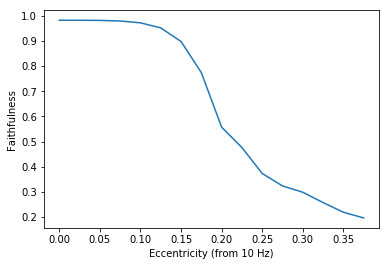

In [15]:
import pylab
pylab.plot(ec, ms)
pylab.ylabel('Faithfulness')
pylab.xlabel('Eccentricity (from 10 Hz)')
pylab.show()